### Data Description

_Variable_    | _Description_| 
--------------|:-----:|
Year  | 事故發生年份 | 
Month| 事故發生月| 
Day| 事故發生日| 
Hour | 事故發生時  |
Processed |事故處理別 A1類車禍;A2類車禍 |
Area |台北市12區 |
Dead |死亡人數 |
Injuryed_number |受傷人數 |
Party|事故參與方數 |
Car_type |車輛類型、車種 |
Gender |1 Male/ 2 Female |
Age | 年齡 |
Injury_severity| 受傷程度 (Label)|
Weather| 天氣狀況 |
Speed_limit| 車速 |
Road_type| 道路型態 |
Accident_loc| 事故地點 |

<font size = 2> * data source:https://data.taipei/dataset/detail/metadata?id=2f238b4f-1b27-4085-93e9-d684ef0e2735 
    
   內有資料詳細說明 </font>



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTENC
sns.set_style('whitegrid')
plt.style.use('ggplot') 

In [18]:
df = pd.read_csv('./accident.csv',encoding='big5')
df.head()

,Year,Month,Day,Hour,Processed,Area,Dead,Injuryed_number,Party,Car_type,Gender,Age,Injury_severity,Weather,Speed_limit,Road_type,Accident_loc
0,101,10,3,10,2,01大同區,0,1,1,B03,1.0,30.0,3.0,8.0,0.0,4.0,2.0
1,101,10,3,10,2,01大同區,0,1,2,C03,1.0,23.0,2.0,8.0,0.0,4.0,2.0
2,101,1,29,12,2,01大同區,0,2,1,C03,1.0,73.0,2.0,8.0,50.0,4.0,1.0
3,101,1,29,12,2,01大同區,0,2,2,C03,1.0,33.0,2.0,8.0,50.0,4.0,1.0
4,101,2,2,23,2,01大同區,0,1,1,B03,1.0,20.0,3.0,7.0,50.0,4.0,1.0


In [19]:
print((df.Year.value_counts().sort_index()))   #各年度事故發生數

101    45950
102    47705
103    49135
104    49519
105    51692
106    50951
107    50329
Name: Year, dtype: int64


#### Overview Dataset 

<font size=3>1. 檢查缺失值
  * 將不合理、label遺失列刪除 </font>
    
<font size=3>2. label可視化
</font>

In [20]:
print(df.isnull().sum()) #filiter the missing value
print('每行缺失情況',df.isnull().sum(axis= 0).sort_values(ascending = False)/float(len(df)),sep='\n') 

Year                    0
Month                   0
Day                     0
Hour                    0
Processed               0
Area                    0
Dead                    0
 Injuryed_number        0
Party                   0
Car_type             7490
Gender                  3
Age                 10984
Injury_severity      9398
Weather               779
Speed_limit             7
Road_type             781
Accident_loc          781
dtype: int64
每行缺失情況
Age                 0.031812
Injury_severity     0.027218
Car_type            0.021692
Accident_loc        0.002262
Road_type           0.002262
Weather             0.002256
Speed_limit         0.000020
Gender              0.000009
Processed           0.000000
Month               0.000000
Day                 0.000000
Hour                0.000000
Party               0.000000
Area                0.000000
Dead                0.000000
 Injuryed_number    0.000000
Year                0.000000
dtype: float64


In [21]:
df['Injury_severity'] = df['Injury_severity'].fillna('999')
droprow = df[df['Injury_severity'] == '999'].index.tolist()
print('丟掉資料筆數:',len(droprow))  #嚴重程度攔遺失丟掉
df = df.drop(index=droprow,axis=1)

droprow_unknow = df[df['Injury_severity'] == 4].index.tolist()
print('丟掉資料筆數:',len(droprow_unknow) ) #嚴重未知丟掉
df = df.drop(index=droprow_unknow,axis=1)


droprow_of_age = df[df['Age'] < 0].index.tolist() #刪掉年齡為負值的比數
print('丟掉年齡資料筆數:',len(droprow_of_age))  
df = df.drop(index=droprow_of_age,axis=1)

droprow_of_speed = df[df['Speed_limit'] >80].index.tolist() #刪掉限速超過80
print('丟掉限速資料筆數:',len(droprow_of_speed))  
df = df.drop(index=droprow_of_speed,axis=1)

droprow_of_weather = df[df['Weather'] == 5].index.tolist()
print('丟掉天氣資料筆數:',len(droprow_of_weather))  
df = df.drop(index=droprow_of_weather,axis=1)

print(df.head(),len(df))
print('每行缺失情況',df.isnull().sum(axis= 0).sort_values(ascending = False)/float(len(df)),sep='\n') 


丟掉資料筆數: 9398
丟掉資料筆數: 15436
丟掉年齡資料筆數: 8
丟掉限速資料筆數: 5
丟掉天氣資料筆數: 2
   Year  Month  Day  Hour  Processed   Area  Dead   Injuryed_number  Party  \
0   101     10    3    10          2  01大同區     0                 1      1   
1   101     10    3    10          2  01大同區     0                 1      2   
2   101      1   29    12          2  01大同區     0                 2      1   
3   101      1   29    12          2  01大同區     0                 2      2   
4   101      2    2    23          2  01大同區     0                 1      1   

  Car_type  Gender   Age Injury_severity  Weather  Speed_limit  Road_type  \
0      B03     1.0  30.0               3      8.0          0.0        4.0   
1      C03     1.0  23.0               2      8.0          0.0        4.0   
2      C03     1.0  73.0               2      8.0         50.0        4.0   
3      C03     1.0  33.0               2      8.0         50.0        4.0   
4      B03     1.0  20.0               3      7.0         50.0        4.0   

   Ac

{1.0, 2.0, 3.0}
2.0    197520
3.0    122334
1.0       578
Name: Injury_severity, dtype: int64
2    319176
1      1256
Name: Processed, dtype: int64


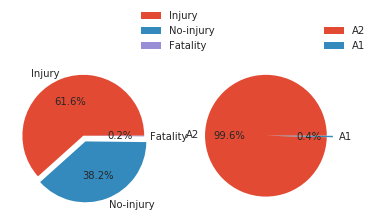

In [22]:
df.Injury_severity = np.where(df.Injury_severity == 5 ,1,np.where(df.Injury_severity == 4,2,df.Injury_severity))
print(set(df.Injury_severity))
plt.figure(figsize=(6,6))
print(df.Injury_severity.value_counts())
#colors = [(1,.4,.4),(1,.6,1),(.5,.3,1),(.7,.7,.2),(.6,.2,.6)]
plt.subplot(1,2,1)
plt.pie(df.Injury_severity.value_counts(),explode=[0,0.1,0] ,labels=['Injury','No-injury','Fatality'],autopct='%1.1f%%')
plt.legend( loc=0, bbox_to_anchor=(0.82, 1))
plt.subplot(1,2,2)
plt.pie(df.Processed.value_counts(),explode=[0,0.1] ,labels=['A2','A1'],autopct='%1.1f%%')
plt.legend(loc=0, bbox_to_anchor=(0.82, 1))
print(df.Processed.value_counts())
#colors = [(1,.4,.4),(1,.6,1),(.5,.3,1),(.7,.7,.2),(.6,.2,.6)]

### Data Preprocessing

<font size=2>1. 填補缺值(car_type / Road_type/ Weather/ Add_loc/Age)
  * 以多數值做填補
  * 每個特徵可視化</font>
<font size=2>2. 特徵提取
  * 日分為：工作日、假日
  * 時間分區段：巔峰、工作、晚間 </font>    
  
<font size=2>3. Label Encoding/One Hot Encoding
  * 類別資料、二元資料做label encoding 
  * 名目資料 one_encoding 
  * 年齡切成五個子資料集以便結果有解釋性</font>

In [23]:
def typeClassifer(type):
    result = np.nan
    if isinstance(type,str) == True:
            result = type[:1]
    return result

df['Car_type'] = df.Car_type.apply(lambda x : typeClassifer(x))
sns.set(font_scale=1)
df['Car_type'] = df.Car_type.fillna('C') # filter 'C' in the missing value

df.Road_type =np.where(df.Road_type == 2 ,1,df.Road_type)
df.Road_type = np.where(df.Road_type== 4 ,3,df.Road_type)
df.Road_type = np.where(df.Road_type== 5 ,3,df.Road_type)
df.Road_type = np.where(df.Road_type== 7 ,6,df.Road_type)
df.Road_type = np.where(df.Road_type== 8 ,6,df.Road_type)
df.Road_type = np.where(df.Road_type== 9 ,6,df.Road_type)
df.Road_type = np.where(df.Road_type> 10 ,11,df.Road_type)
road_mapping = {
    1: 'intersection',
    6:'tunnel',
    10:'expressway',
    11:'turning point'}
df.Road_type = df.Road_type.map(road_mapping)

df.Weather.fillna(float(8),inplace=True)
weather_mapping = {
    6: 'Rainy',
    7:'Cloudy',
    8:'Sunny',}
df.Weather= df.Weather.map(weather_mapping)

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


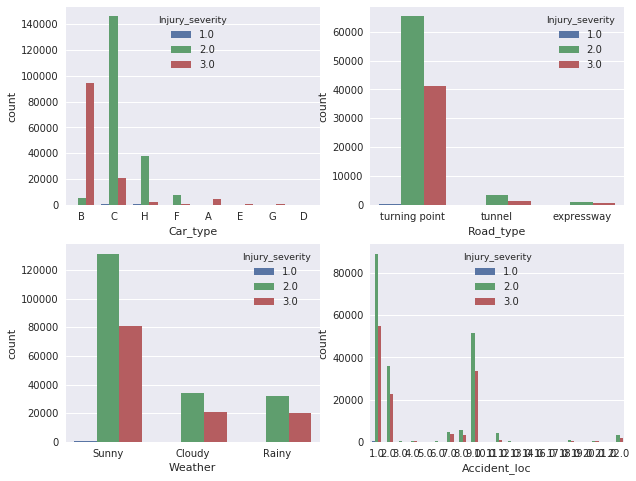

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
print(sns.countplot(df['Car_type'],hue = df['Injury_severity']))
plt.subplot(2,2,2)
print(sns.countplot(df['Road_type'],hue = df['Injury_severity']))
plt.subplot(2,2,3)
print(sns.countplot(df['Weather'],hue = df['Injury_severity']))
plt.subplot(2,2,4)
print(sns.countplot(df['Accident_loc'],hue = df['Injury_severity']))

In [25]:
#Gender
df.Gender = np.where(df.Gender > 2, 3, df.Gender )

#Day
import datetime
def weekday(x):
    out = str()
    year_eur = int(x[0])+1911
    week = datetime.datetime(year_eur,int(x[1]),int(x[2])).weekday()
    if week <5 :
        out = 'Work day'
    else:
        out='Weekend'
    return out

df['Weekday'] = df.apply(weekday,axis=1)

#hr
def timesplit(hr):
    out = str()
    if 7<=hr<=9:
        out = 'Rush Hour'
    elif 10<= hr < 17:
        out = 'Office Hour'
    elif 17<= hr < 20:
        out = 'Rush Hour'
    else:
        out = 'Evening'
    return out
df.Hour = df.Hour.apply(lambda x : timesplit(x))


#Age
bins = [-1,18,26,36,56,66,2000]
age_label = ['under18', '18-25', '26-35', '36-55','56-65','65up']
df['Age'] = pd.cut(df.Age,bins,labels=age_label)
df.Age = df.Age.fillna('36-55')

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)
AxesSubplot(0.547727,0.125;0.352273x0.343182)


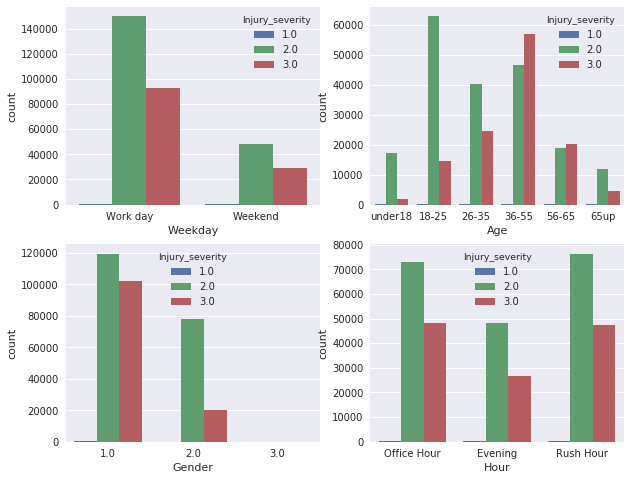

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
print(sns.countplot(df['Weekday'],hue = df['Injury_severity']))
plt.subplot(2,2,2)
print(sns.countplot(df['Age'],hue = df['Injury_severity']))
plt.subplot(2,2,3)
print(sns.countplot(df['Gender'],hue = df['Injury_severity']))
plt.subplot(2,2,4)
print(sns.countplot(df['Hour'],hue = df['Injury_severity']))

In [27]:
#label data transform to cat code (LabelEncoder)
print(set(df.Car_type))
label_data = ['Processed','Area','Car_type','Gender','Weather','Road_type','Injury_severity','Weekday','Hour']
for label in label_data:
    print(label,set(df[label]))
    df[label] = df[label].astype('category').cat.codes
    print(label,set(df[label]))
    
#cause education have order problem
age_mapping = {
    'under18': 0,
    '18-25':1,
    '26-35':2,
    '36-55':3,
    '56-65':4,
    '65up':5}
df.Age = df.Age.map(age_mapping)

{'H', 'E', 'A', 'C', 'B', 'D', 'G', 'F'}
Processed {1, 2}
Processed {0, 1}
Area {'09北投區', '05中正區', '06松山區', '04大安區', '07信義區', '03中山區', '10文山區', '02萬華區', '11南港區', '12內湖區', '08士林區', '01大同區'}
Area {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Car_type {'H', 'E', 'A', 'C', 'B', 'D', 'G', 'F'}
Car_type {0, 1, 2, 3, 4, 5, 6, 7}
Gender {1.0, 2.0, 3.0}
Gender {0, 1, 2}
Weather {'Sunny', nan, 'Rainy', 'Cloudy'}
Weather {0, 1, 2, -1}
Road_type {nan, 'turning point', 'expressway', 'tunnel'}
Road_type {0, 1, 2, -1}
Injury_severity {1.0, 2.0, 3.0}
Injury_severity {0, 1, 2}
Weekday {'Work day', 'Weekend'}
Weekday {0, 1}
Hour {'Rush Hour', 'Evening', 'Office Hour'}
Hour {0, 1, 2}


### SMOTE 處理類別資料不平衡
  
<font size=2> 
* 重新人工合成樣本讓類別平衡
 1. SMOTENC (取最近點)
 2. 處理後類別資料可視化</font>
 
 ### Feature Importance
  
<font size=2> 
* 利用隨機森林來做特徵選擇 
    <br>(_為解省效能將資料拆成兩個子集_)
 1. 特徵重要度評分
 2. 決定CART深度</font>

In [36]:
xLabel = ['Weekday','Hour','Car_type','Party','Gender','Weather','Speed_limit','Age']
yLabel = 'Injury_severity'
X_resampled, y_resampled = SMOTE().fit_sample(df[xLabel],df[yLabel])
df = pd.DataFrame(X_resampled,columns=xLabel)
df['Injury_severity'] = y_resampled

In [37]:
for label in xLabel:
    df[label] = np.round(df[label],0)

2    197520
1    197520
0    197520
Name: Injury_severity, dtype: int64


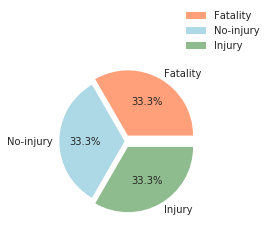

In [39]:
#plot pie of Hour(time of day)
plt.figure(figsize=(3,3))
print(df.Injury_severity.value_counts())
#colors = [(1,.4,.4),(1,.6,1),(.5,.3,1),(.7,.7,.2),(.6,.2,.6)]
plt.pie(df.Injury_severity.value_counts(),explode=[0.1,0,0.1] ,labels=['Fatality','No-injury','Injury'],autopct='%1.1f%%',colors=['lightsalmon','lightblue','darkseagreen'])
plt.legend( loc=0, bbox_to_anchor=(0.82, 1))

In [40]:
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import KFold
from sklearn.tree._tree import TREE_LEAF
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X1 Train Shape : (474048, 8)
X1 Test Shape : (118512, 8)
y1 Train Shape : (474048,)
y1 Test Shape : (118512,)
R2 score from training set :0.6038372428546029
R2 score from test set :0.6040813393792981


Text(0.5, 0, 'Relative Importance')

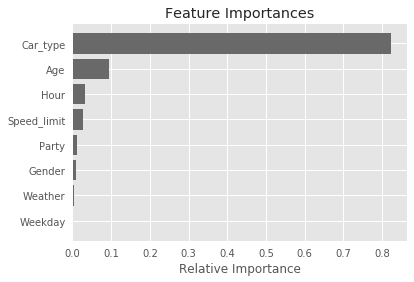

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df[xLabel],df[yLabel], test_size = 0.2, random_state = 87)
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,min_samples_split=20000).fit(X_train, y_train)

print("X1 Train Shape : {}".format(X_train.shape))
print("X1 Test Shape : {}".format(X_test.shape))
print("y1 Train Shape : {}".format(y_train.shape))
print("y1 Test Shape : {}".format(y_test.shape))
print("R2 score from training set :"+str(rf.score(X_train,y_train)))
print("R2 score from test set :"+str(rf.score(X_test,y_test)))
importances = rf.feature_importances_
indices = np.argsort(importances)
# plt.figure(figsize=(25,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='dimgrey', align='center')
plt.yticks(range(len(indices)), np.array(xLabel)[indices])
plt.xlabel('Relative Importance')

In [42]:
rf.fit(df[xLabel], df[yLabel])
print ("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), xLabel), reverse=True))

Features sorted by their score:
[(0.8214, 'Car_type'), (0.0944, 'Age'), (0.0312, 'Hour'), (0.0288, 'Speed_limit'), (0.011, 'Party'), (0.0098, 'Gender'), (0.0034, 'Weather'), (0.0, 'Weekday')]


###  Method
  
<font size=2> 
* Algorithm
 1. Decision tree(with entropy & gini) 
 2. Random forest(with entropy & gini) </font>

<font size=2> 
* Vaildation
 1. Accuracy Score
 2. k-fold cross vaildation
<br>(_check overfitting_)</font>

<font size=2> 
* 可視化決策樹
* 繪製學習曲線 _(RF/CART)_
* 繪製驗證曲線 _(RF)_
 </font>


In [75]:
xLabel = ['Hour','Car_type','Party','Age','Gender','Speed_limit']
yLabel = 'Injury_severity'
def classification(model , trainData):

    model.fit(trainData[xLabel],trainData[yLabel])
    trainPrediction = model.predict(trainData[xLabel])


    # print accuracy 訓練集準確性
    accuracy = accuracy_score(trainPrediction,trainData[yLabel])
    print('Traning Data Accuracy : %s ' % '{0:.2%}'.format(accuracy))

    # k fold cross_validation 交叉驗證準確性
    error = []
    dataSetIndex = [i for i in range(trainData.shape[0])]
    for train , test in KFold(n_splits=10,shuffle=True).split(dataSetIndex): #生成兩組array 分成n份

        trainPredictors = (trainData[xLabel].iloc[train])
        trainTarget = trainData[yLabel].iloc[train]
        model.fit(trainPredictors,trainTarget)

        # Record error from each cross-validation run
        error.append(model.score(trainData[xLabel].iloc[test], trainData[yLabel].iloc[test]))

    print('Cross Validation Score: %s ' % '{0:.2%}'.format(np.mean(error)))

    model.fit(trainData[xLabel], trainData[yLabel])
    importance_df = pd.DataFrame(xLabel,model.feature_importances_)
    print(importance_df)
    return str('processe finished')


# p,s = classification(model=algorithmModel, trainData=userDatafram,testData=testdf)
# prob = ['{:.2f}'.format(i) for i in p[:,0]]

In [76]:
#decision tree CART

tree1 = DecisionTreeClassifier(criterion = 'entropy', random_state=87,max_depth=5,min_samples_leaf=1,min_samples_split=20000)
print(classification(model=tree1, trainData=df))
tree2 = DecisionTreeClassifier(criterion = 'gini', random_state=87,max_depth=5,min_samples_leaf=1,min_samples_split=20000)
print(classification(model=tree2, trainData=df))


Traning Data Accuracy : 73.19% 
Cross Validation Score: 73.14% 
                    0
0.042462         Hour
0.762373     Car_type
0.010156        Party
0.136759          Age
0.027153       Gender
0.021097  Speed_limit
processe finished
Traning Data Accuracy : 73.62% 
Cross Validation Score: 73.63% 
                    0
0.044028         Hour
0.744612     Car_type
0.005911        Party
0.147447          Age
0.039078       Gender
0.018924  Speed_limit
processe finished


In [69]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100,max_depth=5,random_state=1,n_jobs=-1,min_samples_split=20000,
                               min_samples_leaf=1,oob_score=True)
print(classification(model=forest, trainData=df))

forest = RandomForestClassifier(criterion='gini', n_estimators=100,max_depth=5,random_state=1,n_jobs=-1,min_samples_split=20000,
                               min_samples_leaf=1,oob_score=True)
print(classification(model=forest, trainData=df))

Traning Data Accuracy : 75.15% 
Cross Validation Score: 75.07% 
                    0
0.027474         Hour
0.716441     Car_type
0.065170        Party
0.146176          Age
0.031439       Gender
0.013300  Speed_limit
processe finished
Traning Data Accuracy : 75.30% 
Cross Validation Score: 75.12% 
                    0
0.033093         Hour
0.687139     Car_type
0.068787        Party
0.166279          Age
0.033018       Gender
0.011684  Speed_limit
processe finished


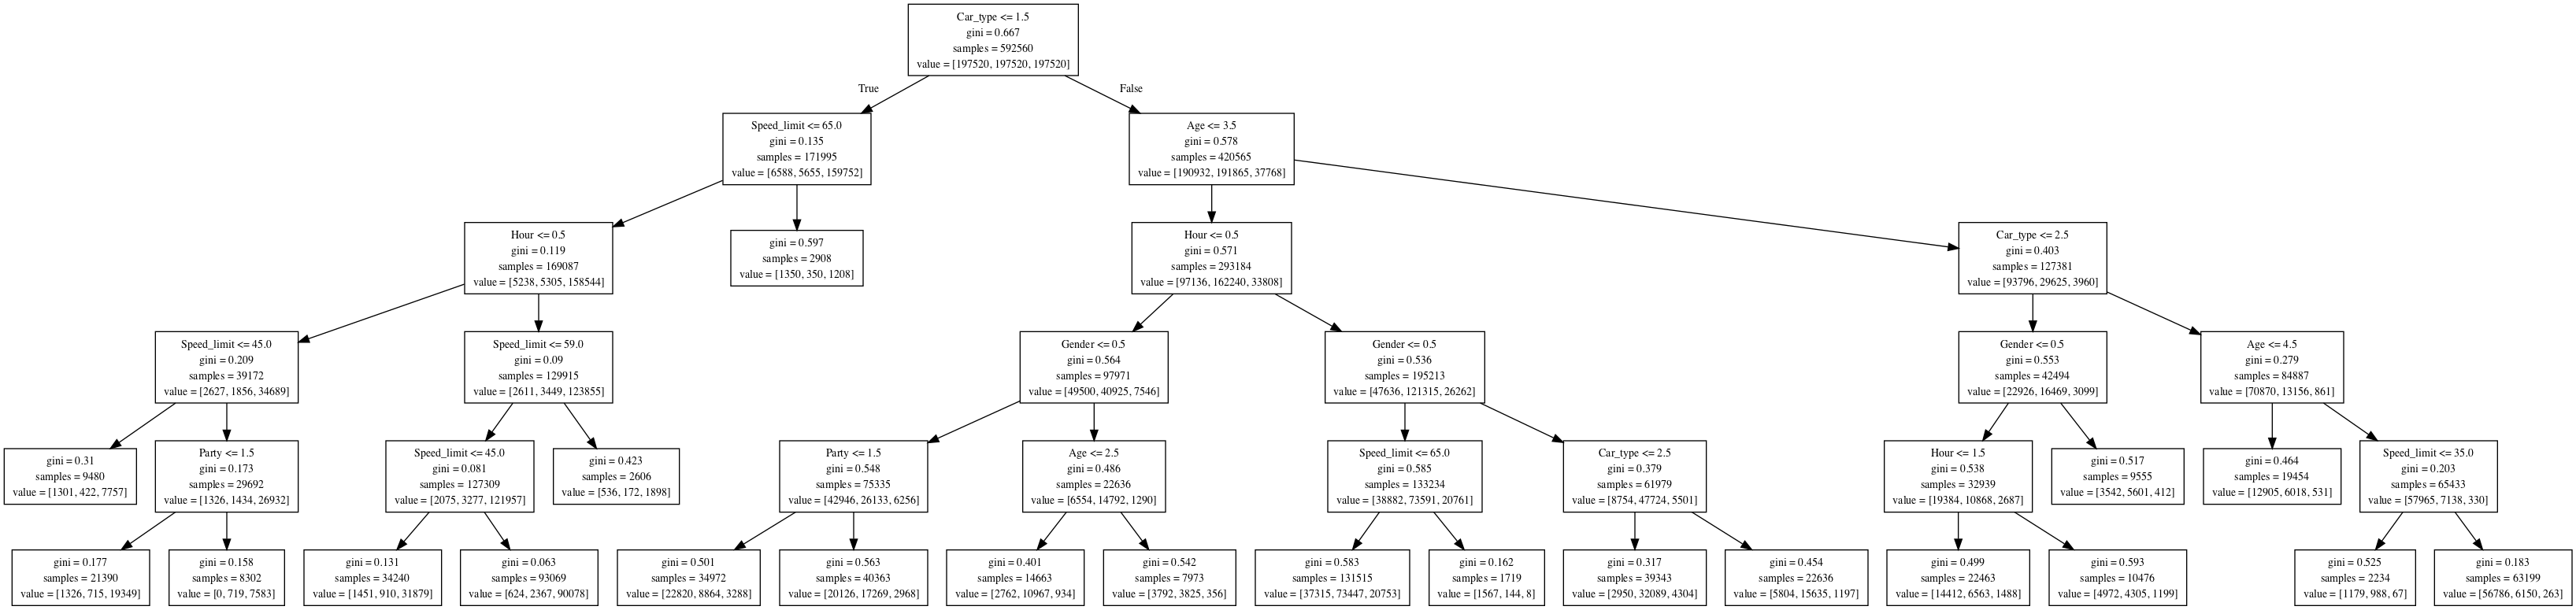

In [71]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(tree2,out_file='tree1.dot',feature_names=xLabel)
pydotplus.graph_from_dot_file('./tree1.dot').write_png('tree1.png')
Image(filename='tree1.png') 

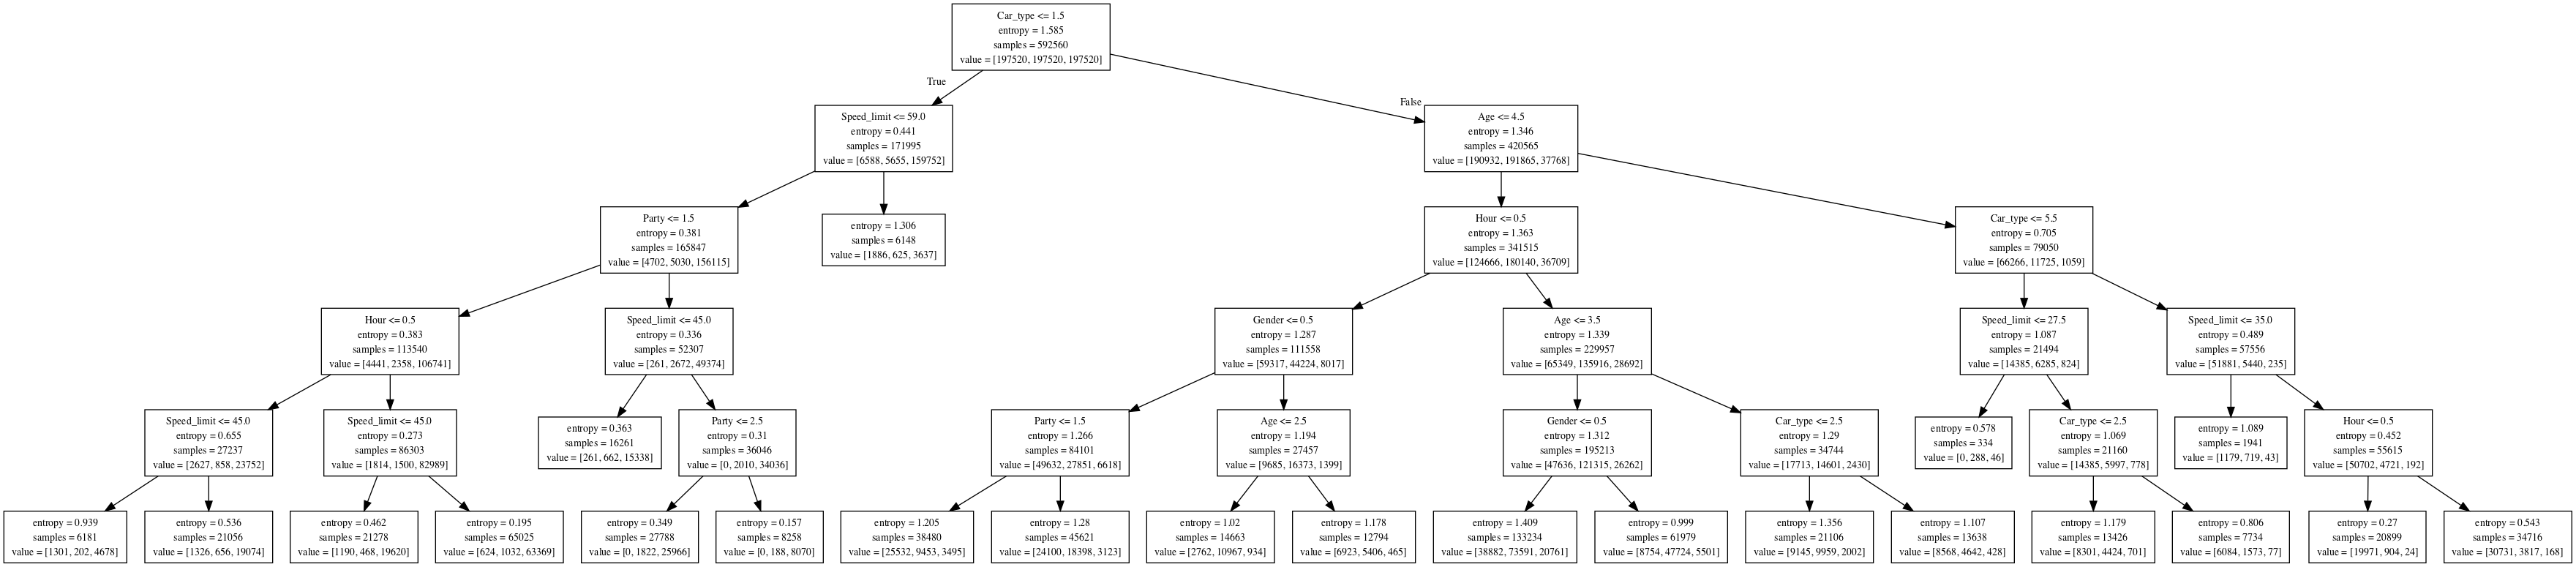

In [72]:
export_graphviz(tree1,out_file='tree2.dot',feature_names=xLabel)
pydotplus.graph_from_dot_file('./tree2.dot').write_png('tree2.png')
Image(filename='tree2.png') 

In [111]:
# class contributions
prediction, bias, contributions = ti.predict(rf, df[xLabel])
fatality , injury,no_injury = [],[],[]
fatality＿bias , injury_bias,no_injury_bias = [],[],[]
for index , predict in enumerate(prediction):
    label = round(predict[0],0)
    if label == 0:
        fatality.append(contributions[index])
        fatality＿bias.append(bias[index])
    if label == 1:
        injury.append(contributions[index])
        injury＿bias.append(bias[index])
    if label == 2:
        no_injury.append(contributions[index])
        no_injury＿bias.append(bias[index])
        
fatality , injury,no_injury  = np.array(fatality),np.array(injury),np.array(no_injury)
fatality＿bias , injury_bias,no_injury_bias  = np.array(fatality＿bias),np.array(injury＿bias),np.array(no_injury＿bias)
print(xLabel)
print('bias_fatality:',(fatality＿bias.sum())/len(fatality＿bias))
print('contributions for fatality:{}'.format(fatality.sum(axis=0)/len(fatality)))
print('bias_injury:',(injury_bias.sum())/len(injury_bias))
print('contributions for injury:{}'.format(injury.sum(axis=0)/len(injury)) )
print('bias_no_injury:',(no_injury＿bias.sum())/len(no_injury_bias))
print('contributions for no_injury:{}'.format(no_injury.sum(axis=0)/len(no_injury)))

['Hour', 'Car_type', 'Party', 'Age', 'Gender', 'Speed_limit']
bias_fatality: 1.0001095416497907
contributions for fatality:[-0.09052835 -0.38188778 -0.00753472 -0.15228938 -0.02252685 -0.00449613]
bias_injury: 1.000109541649791
contributions for injury:[ 0.06901823 -0.33537299  0.00577851  0.11612018  0.01714107 -0.00790097]
bias_no_injury: 1.0001095416497905
contributions for no_injury:[3.91928538e-06 8.90378340e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.61730469e-02]


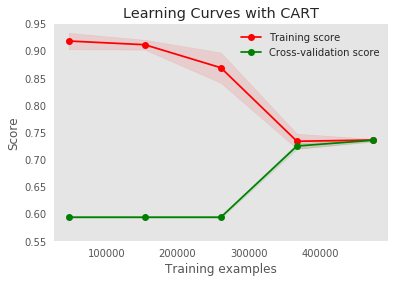

(0.734856627971791, 0.005272554311733124)

In [74]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=1):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff



X, y = df[xLabel], df[yLabel]

title = "Learning Curves with CART"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = tree2
plot_learning_curve(estimator, title, X, y, ylim=(0.55, 0.95), cv=10, n_jobs=4)


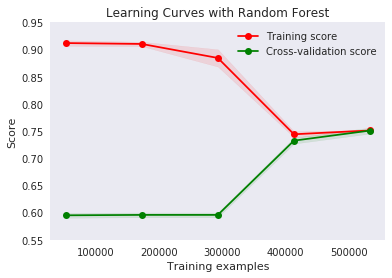

(0.7487109145158217, 0.006616919457097081)

In [61]:
title = "Learning Curves with Random Forest"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = forest
plot_learning_curve(estimator, title, X, y, ylim=(0.55, 0.95), cv=10, n_jobs=4)

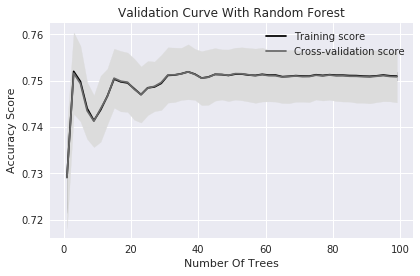

In [62]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 100 , 2)
train_scores, test_scores = validation_curve(forest,np.array(df[xLabel]),np.array(df[yLabel]),param_name="n_estimators", param_range=param_range, cv=10, scoring="accuracy",  n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()